# Diffraction Patterns: Theory and Simulation

## Introduction

Diffraction is the bending and spreading of waves when they encounter an obstacle or pass through an aperture. This phenomenon is a fundamental demonstration of the wave nature of light and is described by the Huygens-Fresnel principle.

## Theoretical Background

### Single-Slit Diffraction

When a plane wave passes through a narrow slit of width $a$, the intensity distribution on a distant screen is given by the Fraunhofer diffraction formula:

$$I(\theta) = I_0 \left( \frac{\sin \beta}{\beta} \right)^2$$

where:
- $\beta = \frac{\pi a \sin \theta}{\lambda}$
- $\lambda$ is the wavelength of light
- $\theta$ is the angle from the central axis
- $I_0$ is the maximum intensity at the center

The minima occur when $\sin \beta = 0$ (excluding $\beta = 0$), giving:

$$a \sin \theta = m \lambda, \quad m = \pm 1, \pm 2, \pm 3, \ldots$$

### Double-Slit Diffraction

For two slits separated by distance $d$, each of width $a$, the intensity pattern combines interference and diffraction:

$$I(\theta) = I_0 \left( \frac{\sin \beta}{\beta} \right)^2 \cos^2 \gamma$$

where:
- $\gamma = \frac{\pi d \sin \theta}{\lambda}$

The $\cos^2 \gamma$ term produces interference fringes, while the $\left( \frac{\sin \beta}{\beta} \right)^2$ term acts as a diffraction envelope.

### Circular Aperture Diffraction (Airy Pattern)

For a circular aperture of diameter $D$, the intensity distribution is:

$$I(\theta) = I_0 \left( \frac{2 J_1(k a \sin \theta)}{k a \sin \theta} \right)^2$$

where $J_1$ is the Bessel function of the first kind of order 1, $k = \frac{2\pi}{\lambda}$, and $a = \frac{D}{2}$.

The first minimum occurs at:

$$\sin \theta \approx 1.22 \frac{\lambda}{D}$$

This defines the **Rayleigh criterion** for angular resolution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j1

# Set up plotting style
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 11
plt.rcParams['axes.grid'] = True

## Single-Slit Diffraction Simulation

We compute the intensity distribution using the sinc function representation.

In [2]:
def single_slit_intensity(theta, a, wavelength):
    """
    Calculate the intensity for single-slit Fraunhofer diffraction.
    
    Parameters:
    -----------
    theta : array-like
        Angles from the central axis (radians)
    a : float
        Slit width (meters)
    wavelength : float
        Wavelength of light (meters)
        
    Returns:
    --------
    Normalized intensity distribution
    """
    beta = np.pi * a * np.sin(theta) / wavelength
    # Handle the singularity at beta = 0
    intensity = np.where(np.abs(beta) < 1e-10, 1.0, (np.sin(beta) / beta)**2)
    return intensity

# Parameters
wavelength = 632.8e-9  # He-Ne laser wavelength (m)
slit_width = 50e-6     # 50 micrometers

# Angular range
theta = np.linspace(-0.05, 0.05, 1000)  # radians

# Calculate intensity
I_single = single_slit_intensity(theta, slit_width, wavelength)

print(f"Wavelength: {wavelength*1e9:.1f} nm")
print(f"Slit width: {slit_width*1e6:.1f} μm")
print(f"First minimum at θ ≈ {np.arcsin(wavelength/slit_width)*1000:.2f} mrad")

Wavelength: 632.8 nm
Slit width: 50.0 μm
First minimum at θ ≈ 12.66 mrad


## Double-Slit Diffraction Simulation

The double-slit pattern shows the interplay between interference (from the two slits) and diffraction (from each slit's finite width).

In [3]:
def double_slit_intensity(theta, a, d, wavelength):
    """
    Calculate the intensity for double-slit Fraunhofer diffraction.
    
    Parameters:
    -----------
    theta : array-like
        Angles from the central axis (radians)
    a : float
        Individual slit width (meters)
    d : float
        Slit separation (center to center, meters)
    wavelength : float
        Wavelength of light (meters)
        
    Returns:
    --------
    Normalized intensity distribution
    """
    beta = np.pi * a * np.sin(theta) / wavelength
    gamma = np.pi * d * np.sin(theta) / wavelength
    
    # Diffraction envelope
    diffraction = np.where(np.abs(beta) < 1e-10, 1.0, (np.sin(beta) / beta)**2)
    
    # Interference term
    interference = np.cos(gamma)**2
    
    return diffraction * interference

# Parameters for double slit
slit_separation = 250e-6  # 250 micrometers

# Calculate intensity
I_double = double_slit_intensity(theta, slit_width, slit_separation, wavelength)

print(f"Slit separation: {slit_separation*1e6:.1f} μm")
print(f"Ratio d/a = {slit_separation/slit_width:.1f}")
print(f"Expected {int(slit_separation/slit_width)} interference maxima within central diffraction maximum")

Slit separation: 250.0 μm
Ratio d/a = 5.0
Expected 5 interference maxima within central diffraction maximum


## Circular Aperture Diffraction (Airy Pattern)

The Airy pattern is crucial in optics as it determines the resolution limit of optical instruments.

In [4]:
def airy_pattern_intensity(theta, D, wavelength):
    """
    Calculate the intensity for circular aperture (Airy) diffraction.
    
    Parameters:
    -----------
    theta : array-like
        Angles from the central axis (radians)
    D : float
        Aperture diameter (meters)
    wavelength : float
        Wavelength of light (meters)
        
    Returns:
    --------
    Normalized intensity distribution
    """
    k = 2 * np.pi / wavelength
    a = D / 2  # radius
    x = k * a * np.sin(theta)
    
    # Handle the singularity at x = 0
    intensity = np.where(np.abs(x) < 1e-10, 1.0, (2 * j1(x) / x)**2)
    return intensity

# Parameters for circular aperture
aperture_diameter = 100e-6  # 100 micrometers

# Calculate intensity
I_airy = airy_pattern_intensity(theta, aperture_diameter, wavelength)

# Rayleigh criterion
theta_rayleigh = 1.22 * wavelength / aperture_diameter

print(f"Aperture diameter: {aperture_diameter*1e6:.1f} μm")
print(f"First minimum (Airy disk radius): θ ≈ {theta_rayleigh*1000:.3f} mrad")

Aperture diameter: 100.0 μm
First minimum (Airy disk radius): θ ≈ 7.720 mrad


## Visualization of Diffraction Patterns

We now create a comprehensive visualization comparing all three diffraction scenarios.

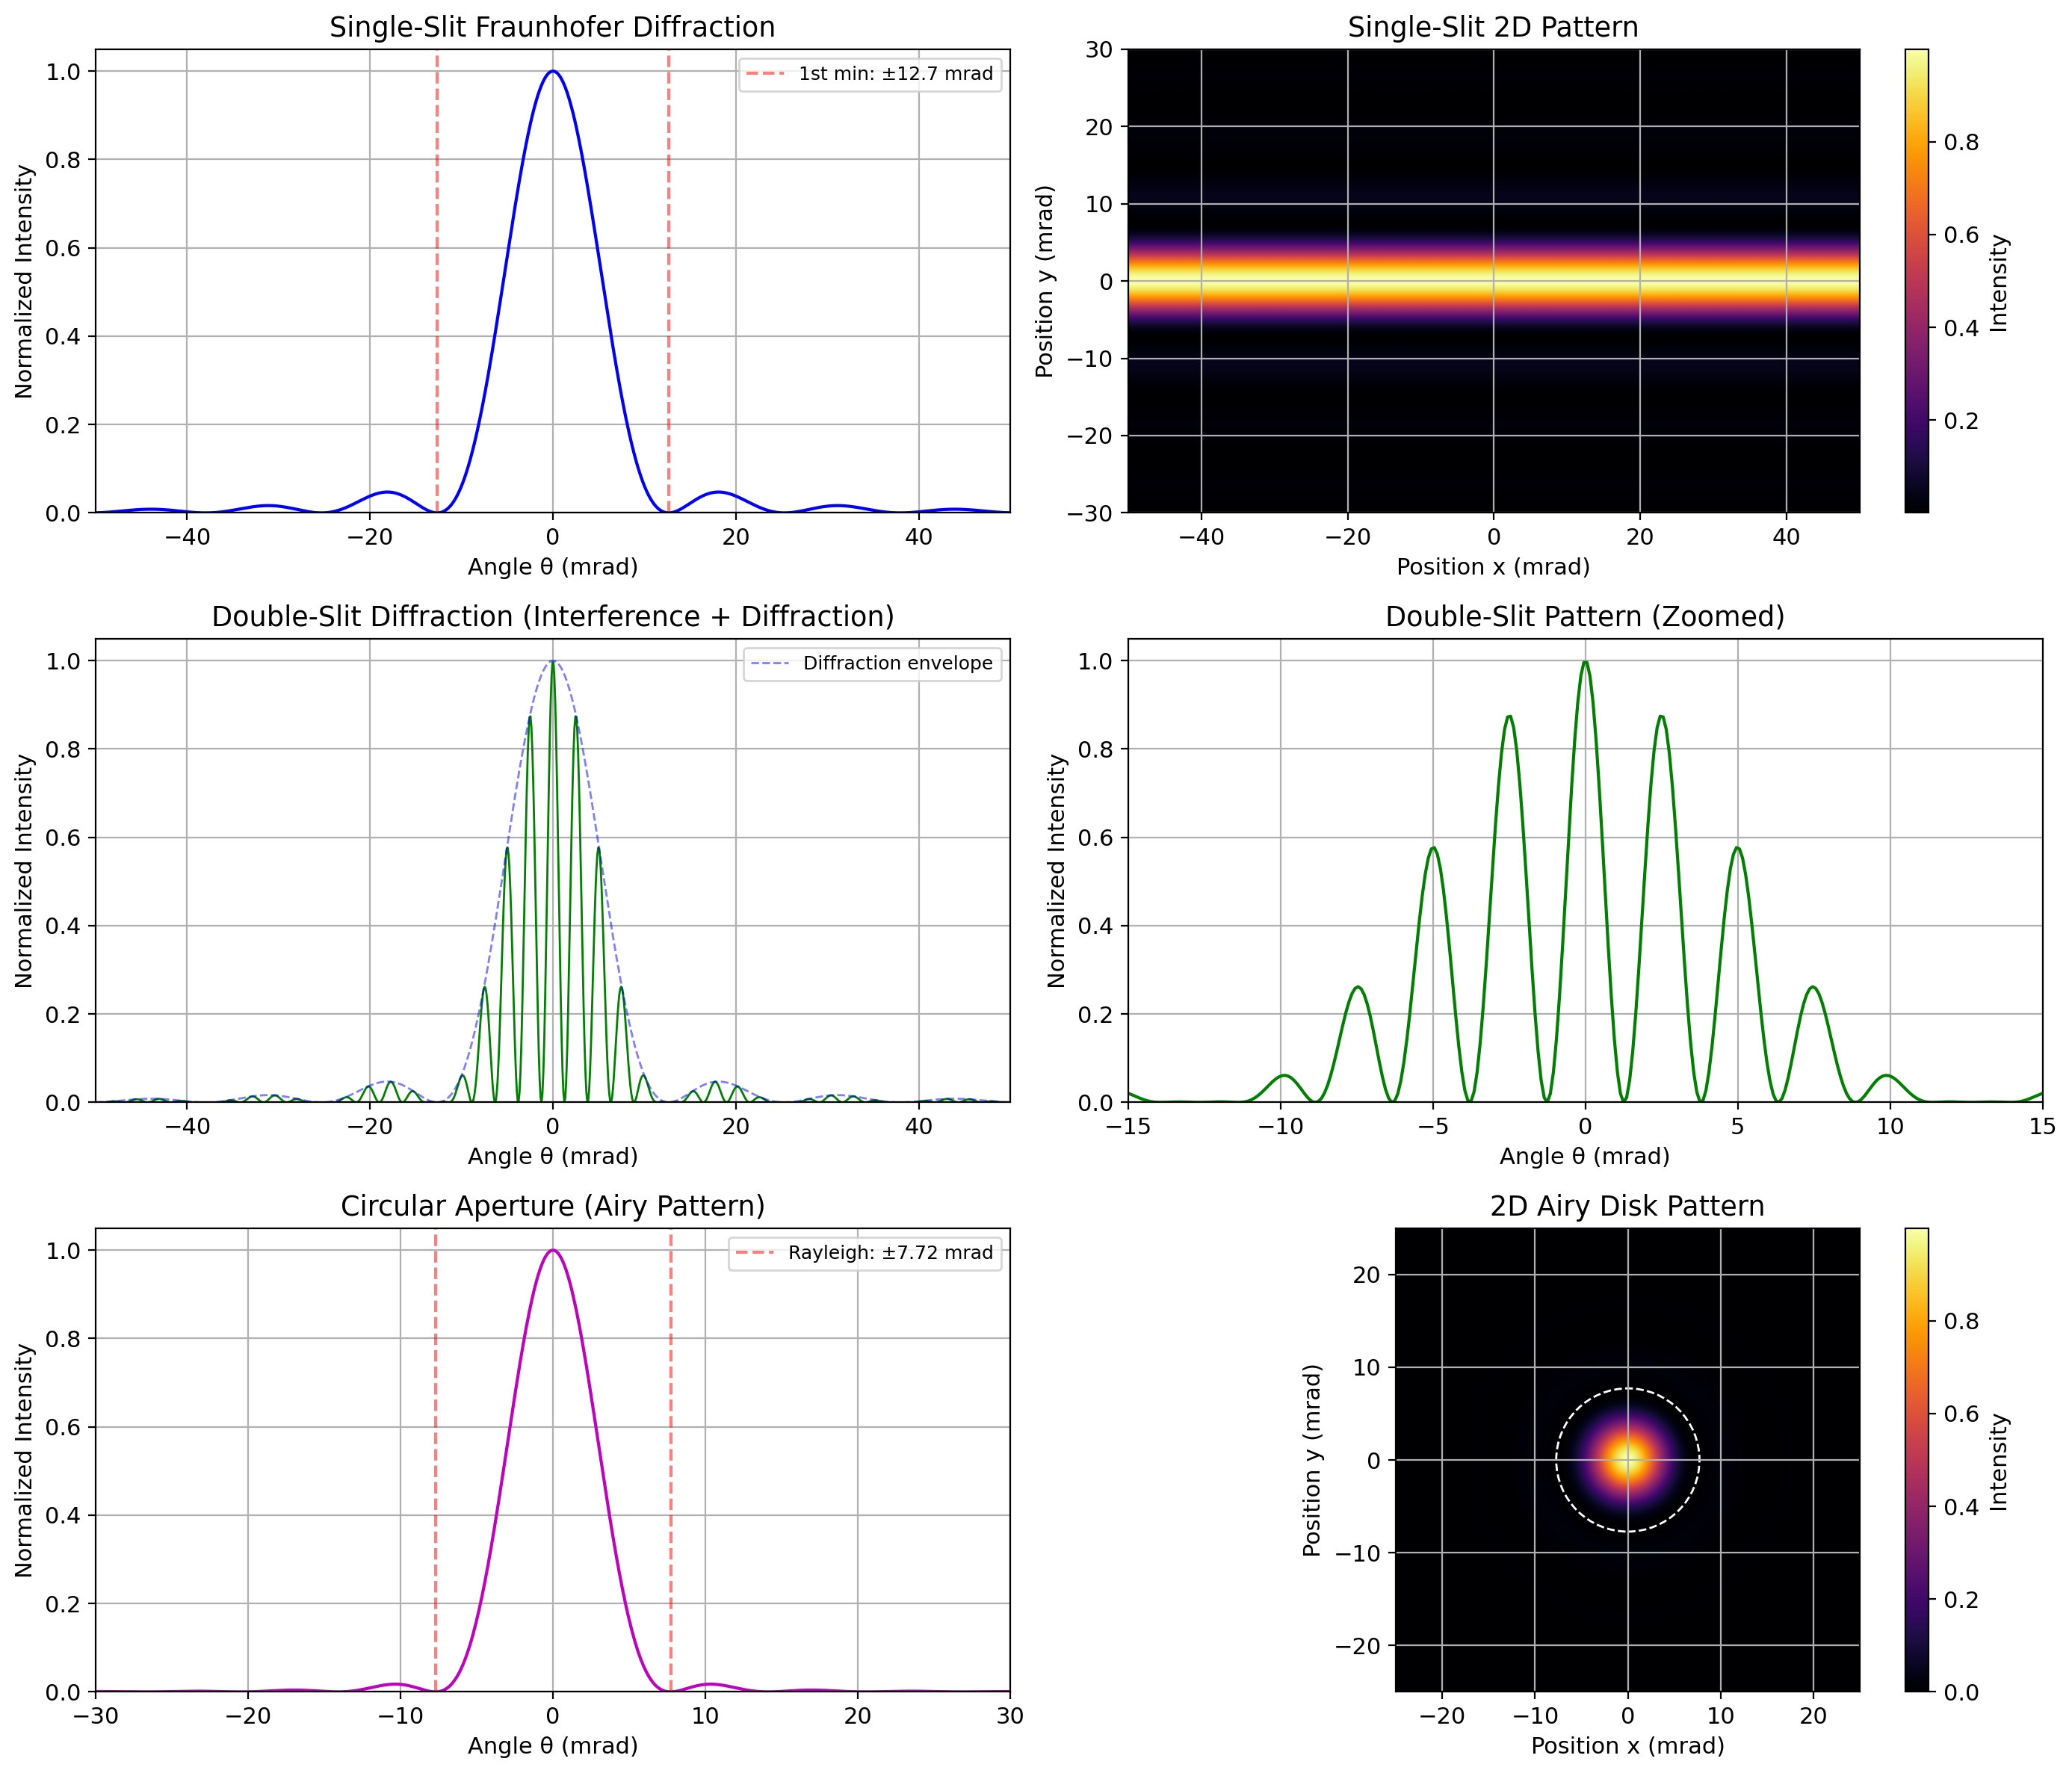


Figure saved to 'plot.png'


In [5]:
# Create the main figure
fig = plt.figure(figsize=(14, 12))

# Convert angles to milliradians for better readability
theta_mrad = theta * 1000

# 1. Single-slit diffraction
ax1 = fig.add_subplot(3, 2, 1)
ax1.plot(theta_mrad, I_single, 'b-', linewidth=1.5)
ax1.set_xlabel('Angle θ (mrad)')
ax1.set_ylabel('Normalized Intensity')
ax1.set_title('Single-Slit Fraunhofer Diffraction')
ax1.set_xlim([-50, 50])
ax1.set_ylim([0, 1.05])

# Mark first minima
theta_min1 = np.arcsin(wavelength/slit_width) * 1000
ax1.axvline(x=theta_min1, color='r', linestyle='--', alpha=0.5, label=f'1st min: ±{theta_min1:.1f} mrad')
ax1.axvline(x=-theta_min1, color='r', linestyle='--', alpha=0.5)
ax1.legend(loc='upper right', fontsize=9)

# 2. Single-slit 2D pattern
ax2 = fig.add_subplot(3, 2, 2)
y = np.linspace(-0.03, 0.03, 300)
X, Y = np.meshgrid(theta, y)
I_2d_single = single_slit_intensity(X, slit_width, wavelength)
im2 = ax2.imshow(I_2d_single.T, extent=[theta_mrad[0], theta_mrad[-1], y[0]*1000, y[-1]*1000],
                  aspect='auto', cmap='inferno', origin='lower')
ax2.set_xlabel('Position x (mrad)')
ax2.set_ylabel('Position y (mrad)')
ax2.set_title('Single-Slit 2D Pattern')
plt.colorbar(im2, ax=ax2, label='Intensity')

# 3. Double-slit diffraction
ax3 = fig.add_subplot(3, 2, 3)
ax3.plot(theta_mrad, I_double, 'g-', linewidth=1)
ax3.plot(theta_mrad, I_single, 'b--', linewidth=1, alpha=0.5, label='Diffraction envelope')
ax3.set_xlabel('Angle θ (mrad)')
ax3.set_ylabel('Normalized Intensity')
ax3.set_title('Double-Slit Diffraction (Interference + Diffraction)')
ax3.set_xlim([-50, 50])
ax3.set_ylim([0, 1.05])
ax3.legend(loc='upper right', fontsize=9)

# 4. Double-slit zoomed view
ax4 = fig.add_subplot(3, 2, 4)
ax4.plot(theta_mrad, I_double, 'g-', linewidth=1.5)
ax4.set_xlabel('Angle θ (mrad)')
ax4.set_ylabel('Normalized Intensity')
ax4.set_title('Double-Slit Pattern (Zoomed)')
ax4.set_xlim([-15, 15])
ax4.set_ylim([0, 1.05])

# 5. Airy pattern (1D slice)
ax5 = fig.add_subplot(3, 2, 5)
ax5.plot(theta_mrad, I_airy, 'm-', linewidth=1.5)
ax5.set_xlabel('Angle θ (mrad)')
ax5.set_ylabel('Normalized Intensity')
ax5.set_title('Circular Aperture (Airy Pattern)')
ax5.set_xlim([-30, 30])
ax5.set_ylim([0, 1.05])

# Mark Rayleigh criterion
theta_rayleigh_mrad = theta_rayleigh * 1000
ax5.axvline(x=theta_rayleigh_mrad, color='r', linestyle='--', alpha=0.5, 
            label=f'Rayleigh: ±{theta_rayleigh_mrad:.2f} mrad')
ax5.axvline(x=-theta_rayleigh_mrad, color='r', linestyle='--', alpha=0.5)
ax5.legend(loc='upper right', fontsize=9)

# 6. Airy pattern 2D
ax6 = fig.add_subplot(3, 2, 6)
# Create 2D Airy pattern
x_2d = np.linspace(-0.025, 0.025, 400)
y_2d = np.linspace(-0.025, 0.025, 400)
X_2d, Y_2d = np.meshgrid(x_2d, y_2d)
R = np.sqrt(X_2d**2 + Y_2d**2)
I_airy_2d = airy_pattern_intensity(R, aperture_diameter, wavelength)

im6 = ax6.imshow(I_airy_2d, extent=[x_2d[0]*1000, x_2d[-1]*1000, y_2d[0]*1000, y_2d[-1]*1000],
                  aspect='equal', cmap='inferno', origin='lower')
ax6.set_xlabel('Position x (mrad)')
ax6.set_ylabel('Position y (mrad)')
ax6.set_title('2D Airy Disk Pattern')
plt.colorbar(im6, ax=ax6, label='Intensity')

# Add circular marker for Airy disk
circle = plt.Circle((0, 0), theta_rayleigh_mrad, fill=False, color='white', 
                      linestyle='--', linewidth=1)
ax6.add_patch(circle)

plt.tight_layout()
plt.savefig('diffraction_patterns_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure saved to 'plot.png'")

## Analysis and Discussion

### Key Observations

1. **Single-Slit Pattern**: The central maximum contains most of the light energy. The width of the central peak is inversely proportional to the slit width—narrower slits produce broader diffraction patterns.

2. **Double-Slit Pattern**: The interference fringes are modulated by the single-slit diffraction envelope. The ratio $d/a$ determines how many interference maxima fit within the central diffraction maximum.

3. **Airy Pattern**: The circular symmetry of the aperture produces concentric rings. The Airy disk (central bright spot) defines the fundamental resolution limit of imaging systems.

### Applications

- **Microscopy**: The Airy disk determines the resolution limit (Rayleigh criterion: $\delta \approx 0.61 \lambda / \text{NA}$)
- **Spectroscopy**: Diffraction gratings use multiple-slit diffraction for wavelength separation
- **Astronomy**: Telescope resolution is limited by the Airy pattern of the primary aperture
- **Holography**: Diffraction is fundamental to recording and reconstructing wavefronts

In [6]:
# Quantitative analysis
print("="*60)
print("DIFFRACTION PATTERN ANALYSIS SUMMARY")
print("="*60)
print(f"\nLight source: λ = {wavelength*1e9:.1f} nm (He-Ne laser)")
print("\n--- Single Slit ---")
print(f"Slit width a = {slit_width*1e6:.1f} μm")
print(f"Central maximum width: {2*np.arcsin(wavelength/slit_width)*1000:.2f} mrad")
print(f"Angular spread parameter: a/λ = {slit_width/wavelength:.1f}")

print("\n--- Double Slit ---")
print(f"Slit width a = {slit_width*1e6:.1f} μm")
print(f"Slit separation d = {slit_separation*1e6:.1f} μm")
print(f"Fringe spacing: {wavelength/slit_separation*1000:.3f} mrad")
print(f"Fringes in central maximum: ~{int(2*slit_separation/slit_width) - 1}")

print("\n--- Circular Aperture (Airy) ---")
print(f"Aperture diameter D = {aperture_diameter*1e6:.1f} μm")
print(f"Airy disk angular radius: {1.22*wavelength/aperture_diameter*1000:.3f} mrad")
print(f"Second ring radius: {2.23*wavelength/aperture_diameter*1000:.3f} mrad")
print("\n" + "="*60)

DIFFRACTION PATTERN ANALYSIS SUMMARY

Light source: λ = 632.8 nm (He-Ne laser)

--- Single Slit ---
Slit width a = 50.0 μm
Central maximum width: 25.31 mrad
Angular spread parameter: a/λ = 79.0

--- Double Slit ---
Slit width a = 50.0 μm
Slit separation d = 250.0 μm
Fringe spacing: 2.531 mrad
Fringes in central maximum: ~9

--- Circular Aperture (Airy) ---
Aperture diameter D = 100.0 μm
Airy disk angular radius: 7.720 mrad
Second ring radius: 14.111 mrad

